In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier #import decisiontree
from sklearn.ensemble import RandomForestClassifier #importa randomforest
import xgboost as xgb #importa xgboost

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn import tree
from sklearn.tree import plot_tree

import graphviz

import pickle

In [4]:
#1.: Carregar o conjunto de dados load_digits e pré-processar os dados:

# Carrega os dígitos 8x8 do scikit-learn
numerosds = load_digits()

# Divide os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(numerosds.data, numerosds.target, test_size=0.25, random_state=42)

In [5]:
#Ajustando os parâmetros de treinamento:

#random_state: ele garante que a árvore de decisão gerada seja sempre a mesma para um determinado conjunto de dados e um valor específico (a fim de tirar a aleatoriedade, ajudando na comparação de diferentes modelos)

#max_depth: Define a profundidade máxima de cada árvore. Valores maiores permitem modelos mais complexos, mas podem levar ao overfitting.

#learning_rate: Controla a taxa de aprendizado. Valores menores levam a modelos mais conservadores, enquanto valores maiores podem levar a convergência mais rápida, mas com maior risco de overfitting.

#n_estimators: Número de árvores no ensemble. Um número maior de árvores geralmente melhora o desempenho, mas pode aumentar o tempo de treinamento.

#subsample: Fração de observações utilizadas para treinar cada árvore. Valores menores podem ajudar a prevenir overfitting.

#colsample_bytree: Fração de features utilizadas para cada árvore. Valores menores podem ajudar a prevenir overfitting.

#gamma: Valor mínimo de redução de perda necessária para fazer uma divisão. Valores maiores fazem com que o modelo seja mais conservador.

In [6]:
#Métricas de Avaliação:

#Acurácia: Representa a proporção total de exemplos classificados corretamente.
#(É uma métrica simples, mas pode ser enganosa em datasets desbalanceados).

#Precisão: Mede a proporção de exemplos classificados como positivos que realmente são positivos.
#(É útil quando o custo de falsos positivos é alto).

#Recall: Mede a proporção de exemplos positivos que foram corretamente classificados como positivos.
#(É útil quando o custo de falsos negativos é alto).

#F1-Score: É a média harmônica entre precisão e recall.
#(É uma boa medida quando se deseja um bom equilíbrio entre precisão e recall).

Treinando um modelo de árvore simples: DecisionTreeClassifier

In [ ]:
#Treinando o modelo >> 0s

modeloDTC = DecisionTreeClassifier(random_state=42)
modeloDTC.fit(x_train, y_train)

#Realizando predições:
y_pred1 = modeloDTC.predict(x_test)

In [ ]:
#Métricas do modelo: modeloDTC = DecisionTreeClassifier(random_state=42)

# Relatório de classificação completo
print(classification_report(y_test, y_pred1))

#Matriz de confusão:
print(metrics.confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.84      0.86      0.85        37
           2       0.89      0.84      0.86        38
           3       0.79      0.83      0.81        46
           4       0.91      0.89      0.90        55
           5       0.89      0.81      0.85        59
           6       0.93      0.96      0.95        45
           7       0.88      0.88      0.88        41
           8       0.69      0.71      0.70        38
           9       0.81      0.88      0.84        48

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450

[[39  0  0  0  3  1  0  0  0  0]
 [ 0 32  1  1  0  0  0  0  3  0]
 [ 0  1 32  3  0  1  0  0  1  0]
 [ 0  0  0 38  0  1  0  1  3  3]
 [ 0  1  0  0 49  1  2  2  0  0]
 [ 0  1  1  1  1 48  1  1  1  4]
 [ 2  0  0  0  0  0 43  0  0  0]
 [ 0  0  0

In [ ]:
#Ajustando os parâmetros para retreino >> 0s

modeloDTC2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)
modeloDTC2.fit(x_train, y_train)

#Realizando predições:
y_pred2 = modeloDTC2.predict(x_test)

In [ ]:
#Métricas do Modelo: modeloDTC2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

# Relatório de classificação completo
print(classification_report(y_test, y_pred2))

#Matriz de confusão:
print(metrics.confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.32      0.32      0.32        37
           2       0.57      0.66      0.61        38
           3       0.89      0.85      0.87        46
           4       0.80      0.78      0.79        55
           5       0.48      0.25      0.33        59
           6       1.00      0.84      0.92        45
           7       0.90      0.63      0.74        41
           8       0.37      0.61      0.46        38
           9       0.52      0.73      0.61        48

    accuracy                           0.66       450
   macro avg       0.68      0.66      0.66       450
weighted avg       0.68      0.66      0.66       450

[[40  0  0  0  2  1  0  0  0  0]
 [ 0 12  3  1  0  0  0  0 17  4]
 [ 1  0 25  1  0  0  0  1 10  0]
 [ 0  1  1 39  0  1  0  0  2  2]
 [ 0  5  3  0 43  3  0  1  0  0]
 [ 1  7  1  0  3 15  0  0  9 23]
 [ 1  1  2  0  1  1 38  0  1  0]
 [ 0  0  6

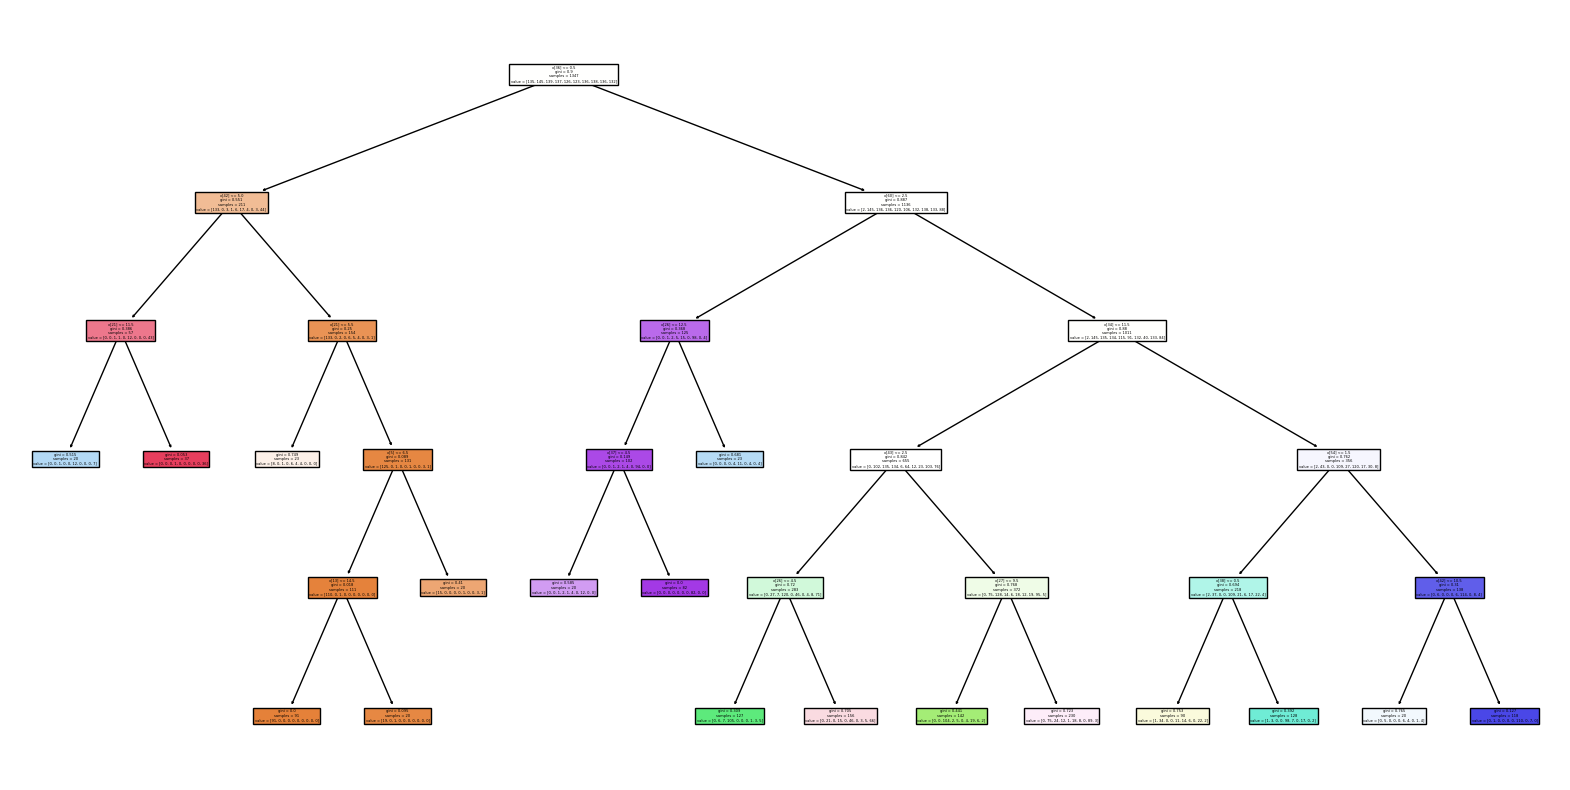

In [ ]:
# Visualizando a Árvore de Decisão:

plt.figure(figsize=(20,10))
plot_tree(modeloDTC2, filled=True)

plt.show()

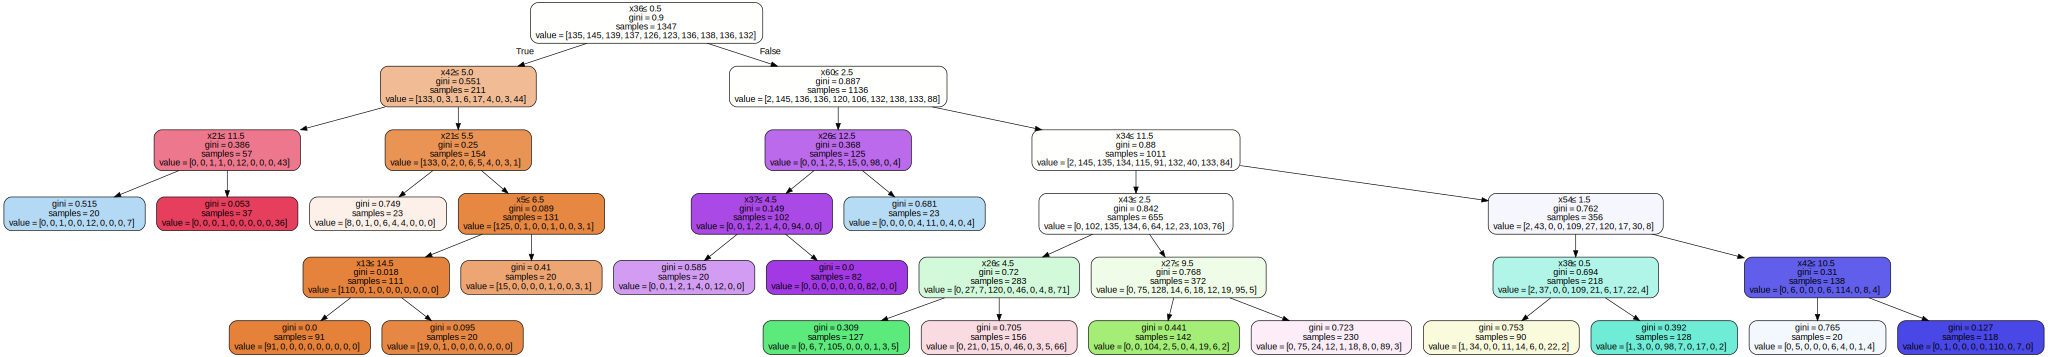

In [ ]:
# Visualizar a árvore de decisão treinada utilizando o Graphviz.

# Exporta a árvore de decisão para um arquivo .dot
dot_data = tree.export_graphviz(modeloDTC2, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)

# Cria o gráfico a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Renderiza o gráfico como um arquivo PDF (ou outro formato de sua preferência)
graph.render("decision_tree")

# Exibe o gráfico no Colab
graph

Treinando um modelo de árvore com Modelos Ensemble: XGBoost



In [7]:
#Treinando o modelo >> 0s

modeloXGB = xgb.XGBClassifier(n_estimators=100)
modeloXGB.fit(x_train, y_train)

#Realizando predições:
y_pred3 = modeloXGB.predict(x_test)

In [8]:
#Métricas do modelo: modeloXGB = xgb.XGBClassifier(n_estimators=100)

# Relatório de classificação completo
print(classification_report(y_test, y_pred3))

#Matriz de confusão:
print(metrics.confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        37
           2       0.95      1.00      0.97        38
           3       1.00      0.93      0.97        46
           4       0.98      0.98      0.98        55
           5       0.97      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.97      0.96        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0

Treinando um modelo de árvore com Modelos Ensemble: Random Forest


In [ ]:
#Treinando o modelo >> 0s

modeloRF = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)
modeloRF.fit(x_train, y_train)

#Realizando predições:
y_pred4 = modeloRF.predict(x_test)

In [ ]:
#Métricas do Modelo: modeloRF = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Relatório de classificação completo
print(classification_report(y_test, y_pred4))

#Matriz de confusão:
print(metrics.confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.92      0.89      0.90        37
           2       0.93      1.00      0.96        38
           3       1.00      0.91      0.95        46
           4       0.96      0.96      0.96        55
           5       0.96      0.93      0.95        59
           6       0.98      0.98      0.98        45
           7       0.91      0.98      0.94        41
           8       0.92      0.95      0.94        38
           9       0.90      0.92      0.91        48

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 33  3  0  0  0  0  0  0  1]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  1  0 42  0  0  0  0  3  0]
 [ 0  0  0  0 53  0  0  2  0  0]
 [ 0  0  0  0  0 55  1  0  0  3]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0

In [9]:
# Gerando .pkl do modelo - XGBOOST: modeloXGB = xgb.XGBClassifier(n_estimators=100)

# Salvando o modelo em um arquivo .pkl
filename = 'XGBC_model.pkl'
pickle.dump(modeloXGB, open(filename, 'wb'))